In [6]:
pip install tensorflow


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl (390.3 MB)
Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
Using cached rich-13.9.4-py3-none-any.whl (242 kB)


In [8]:
pip install matplotlib


     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     ---------------------------------------  163.8/167.0 kB ? eta -:--:--
     -------------------------------------- 167.0/167.0 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.6/7.8 MB 12.0 MB/s eta 0:00:01
   ----- ---------------------------------- 1.1/7.8 MB 12.1 MB/s eta 0:00:01
   -------- ------------------------------- 1.8/7.8 MB 12.4 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/7.8 MB 12.0 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/7.8 MB 12.3 MB/s eta 0:00:01
   ------------------ --------------------- 3.6/7.8 MB 12.0 MB/s eta 0:00:01
   --------------------- ------------------ 4.1/7.8 MB 12.0 MB/s eta 0:00:01
   --------------------- ------------------ 4.3/7.8 MB 11.8 MB/s eta 0:00:01
   --------------------------- ------------ 5.4/7.8 MB 11.8 MB/s eta 0:00:01
   ------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install numpy

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 108.9 kB/s eta 0:00:01
     ------------ ------------------------- 20.5/60.8 kB 108.9 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 151.3 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 187.0 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 187.0 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 187.0 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 187.0 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 187.0 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 187.0 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 187.

In [1]:
import tensorflow as tf

In [58]:
data_dir = "./horse-or-human/horse-or-human"

In [59]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(128, 128))

Found 1027 files belonging to 2 classes.
Using 822 files for training.


In [60]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(128, 128))

Found 1027 files belonging to 2 classes.
Using 205 files for validation.


In [61]:
class_names = train_ds.class_names
print(class_names)

['horses', 'humans']


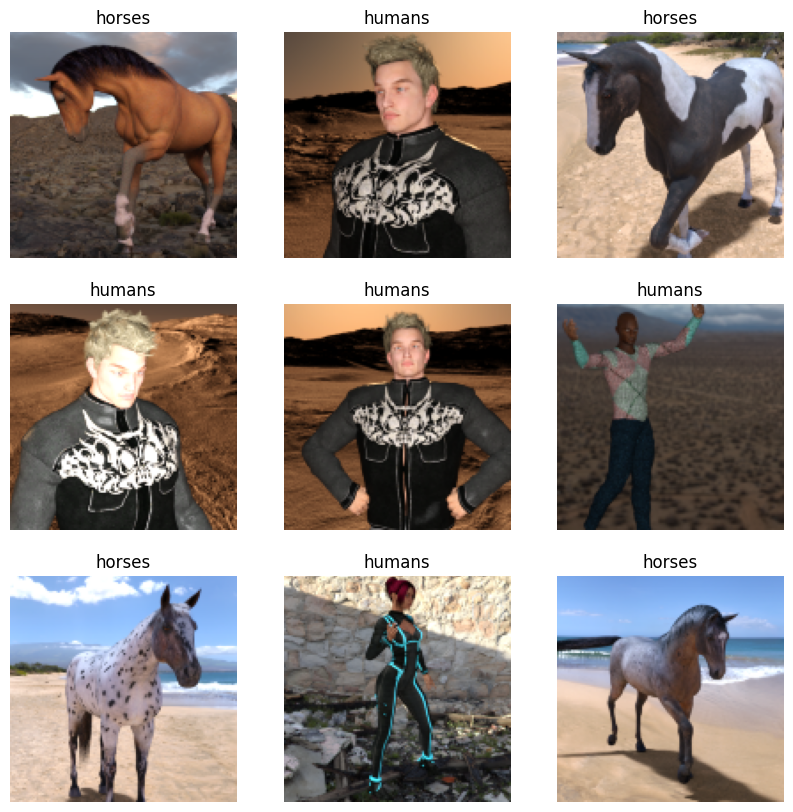

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [63]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [64]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [65]:
import numpy as np

In [66]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.008408012 1.0


In [67]:
from tensorflow.keras import datasets, layers, models

In [81]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


In [82]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_12 (Rescaling)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [83]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [84]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 629ms/step - accuracy: 0.4876 - loss: 0.8354 - val_accuracy: 0.7951 - val_loss: 0.6563
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 658ms/step - accuracy: 0.7747 - loss: 0.5719 - val_accuracy: 0.9317 - val_loss: 0.2742
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 671ms/step - accuracy: 0.9304 - loss: 0.2252 - val_accuracy: 0.9561 - val_loss: 0.1197


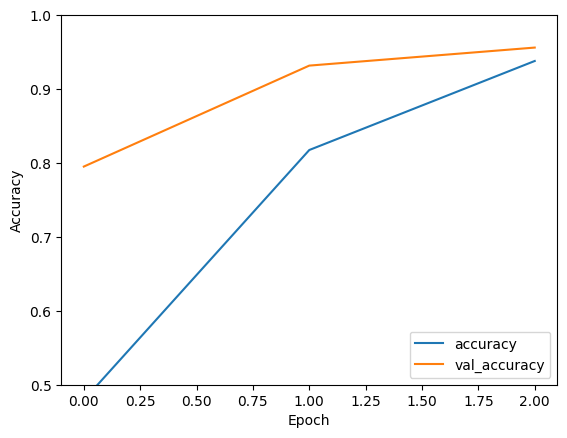

In [85]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')